In [48]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import pandas as pd
import requests
import math
import csv
import os

In [49]:
# https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series.csv

In [50]:
data = ["1/22/20","1/23/20","1/24/20","1/25/20","1/26/20","1/27/20","1/28/20","1/29/20","1/30/20","1/31/20","2/1/20","2/2/20","2/3/20","2/4/20","2/5/20","2/6/20","2/7/20","2/8/20","2/9/20","2/10/20","2/11/20","2/12/20","2/13/20","2/14/20","2/15/20","2/16/20","2/17/20","2/18/20","2/19/20","2/20/20","2/21/20","2/22/20","2/23/20","2/24/20","2/25/20","2/26/20","2/27/20","2/28/20","2/29/20","3/1/20","3/2/20","3/3/20","3/4/20","3/5/20","3/6/20","3/7/20","3/8/20","3/9/20","3/10/20","3/11/20","3/12/20","3/13/20","3/14/20","3/15/20","3/16/20","3/17/20","3/18/20","3/19/20","3/20/20","3/21/20","3/22/20","3/23/20","3/24/20","3/25/20","3/26/20","3/27/20","3/28/20","3/29/20","3/30/20","3/31/20","4/1/20","4/2/20","4/3/20","4/4/20","4/5/20","4/6/20","4/7/20","4/8/20","4/9/20","4/10/20","4/11/20","4/12/20","4/13/20","4/14/20","4/15/20","4/16/20","4/17/20","4/18/20","4/19/20","4/20/20","4/21/20","4/22/20","4/23/20","4/24/20","4/25/20","4/26/20","4/27/20","4/28/20","4/29/20","4/30/20","5/1/20","5/2/20","5/3/20","5/4/20","5/5/20","5/6/20","5/7/20","5/8/20","5/9/20"]

In [51]:
confirmed = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,4,4,13,13,20,25,31,38,52,151,151,162,200,321,372,621,793,1021,1546,1924,2247,2554,2985,3417,3904,4256,4579,5717,6836,8044,9056,10360,11130,12161,14034,16170,18092,19638,20727,22192,23430,25262,28320,30425,33682,36658,38654,40743,43079,45757,50036,54043,59324,63100,67446,73235,79685,87187,92202,97100,101826,108620,115455,126611,135773,146894,156061]

In [52]:
death = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,6,11,15,25,34,46,59,77,92,111,136,159,201,240,324,359,445,486,564,686,819,950,1057,1124,1223,1328,1532,1736,1924,2141,2354,2462,2587,2741,2906,3331,3704,4057,4286,4603,5083,5513,6006,6412,6761,7051,7367,7938,8588,9190,10017,10656]

In [53]:
recovered = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,6,6,6,6,120,127,127,127,127,127,127,127,127,127,173,173,173,173,173,3046,14026,14026,14026,14026,22130,22130,22991,25318,26573,27655,29160,30152,31142,32544,34132,35935,38039,40937,42991,45815,48221,51370,55350,59297,61685]

In [54]:
n = 20000000

In [55]:
def med(v):
    cases = len(v)
    casesAt = v[cases-1]
    media = casesAt/cases
    return media

In [56]:
def qtd(v):
    cases = len(v)
    casesAt = v[cases-1]
    return casesAt

In [57]:
medC = med(confirmed)
medM = med(death)
medR = med(recovered)

In [58]:
qtdC = qtd(confirmed)
qtdM = qtd(death)
qtdR = qtd(recovered)

In [59]:
dxDt = qtdC/N
dbDt = qtdR/qtdC
dyDt = qtdM/qtdC

In [60]:
I0 = qtdC
R0 = qtdR
M0 = qtdM

In [61]:
S0 = N - I0 - R0 - M0

In [62]:
alfa = dxDt
beta = dbDt
gama = dyDt

In [63]:
dias = range(0, 60)
integrate = [0, 1001]

In [64]:
def deriv(t, y, N, alfa, beta, gama):
    S, I, R, M = y
    dSdt = -alfa * S * I
    dIdt = alfa * S * I - beta * I - gama * I
    dRdt = beta * I
    dMdT = gama * I
    return dSdt, dIdt, dRdt, dMdT

In [65]:
y0 = S0, I0, R0, M0

In [66]:
def RK1(alfa, beta, gama, n, c):
    k1 = -alfa*n
    k2 = alfa*n-beta*c-gama*c
    k3 = beta*c
    k4 = gama*c
    return k1, k2, k3, k4

In [67]:
def RK2(alfa, beta, gama, n, c, kN):
    k1 = -alfa*(n+kN[0]/2)
    k2 = alfa*(n+kN[1]/2)-beta*(c+kN[1]/2)-gama*(c+kN[1]/2)
    k3 = beta*(c+kN[2]/2)
    k4 = gama*(c+kN[3]/2)
    return k1, k2, k3, k4

In [68]:
def RK3(alfa, beta, gama, n, c, kC):
    k1 = -alfa*(n+kC[0]/2)
    k2 = alfa*(n+kC[1]/2)-beta*(c+kC[1]/2)-gama*(c+kC[1]/2)
    k3 = beta*(c+kC[2]/2)
    k4 = gama*(c+kC[3]/2)
    return k1, k2, k3, k4

In [69]:
def RK4(alfa, beta, gama, n, c, kR):
    k1 = -alfa*(n+kR[0])
    k2 = alfa*(n+kR[1])-beta*(c+kR[1])-gama*(c+kR[1])
    k3 = beta*(c+kR[2])
    k4 = gama*(c+kR[3])
    return k1, k2, k3, k4  

In [70]:
def integrated():
    h, t, c,r, m = 1, 0, 0, 0, 0
    
    n = N
    c = qtdC
    r = qtdR
    m = qtdM

    tGraf, nGraf, cGraf, rGraf, mGraf = [0],[n],[c],[r],[m]
  
    while t < 100:
        
        kN = h*RK1(alfa, beta, gama, n, c)
        kC = h*RK2(alfa, beta, gama, n, c, kN)
        kR = h*RK3(alfa, beta, gama, n, c, kC)
        kM = h*RK2(alfa, beta, gama, n, c, kR)

        kN1, kN2, kN3, kN4 = kN[0], kN[1], kN[2], kN[3]
        kC1, kC2, kC3, kC4 = kC[0], kC[1], kC[2], kC[3]
        kR1, kR2, kR3, kR4 = kR[0], kR[1], kR[2], kR[3]
        kM1, kM2, kM3, kM4 = kM[0], kM[1], kM[2], kM[3]

        n += (kN1+2*kC1+2*kR1+kM1)/6
        c += (kN2+2*kC2+2*kR2+kM2)/6
        r += (kN3+2*kC3+2*kR3+kM3)/6
        m += (kN4+2*kC4+2*kR4+kM4)/6

        tGraf.append(t)
        nGraf.append(n)
        cGraf.append(c)
        rGraf.append(r)
        mGraf.append(m)

        t+=h

    graf = plt.figure(facecolor='w')
    plt.xlabel('Tempo/dias')
    plt.ylabel('Indivíduos')
    plt.plot(tGraf, nGraf, 'b', label='Suscetíveis')
    plt.plot(tGraf, cGraf, 'g', label='Infectados')
    plt.plot(tGraf, rGraf, 'y', label='Recuperados')
    plt.plot(tGraf, mGraf, 'r', label='Mortos')
    plt.legend()
    plt.show()
    graf.savefig('grafico.png')

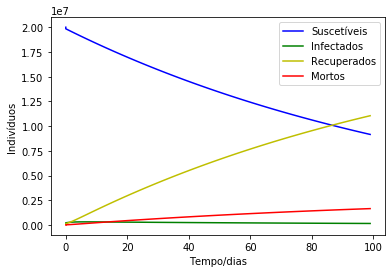

In [71]:
integrated()